### import package

In [18]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
# define our linear regression
class LinearReg:
    def __init__(self, data):
        '''data: type: pandas dataframe'''
        self.data = data
        self.length = len(data)
    def ols(self, x, y):
        '''
        x: column name
        y: column name
        '''
        X = np.matrix(np.vstack([np.ones(self.length), self.data[x].values]).T)
        y = np.matrix(self.data[y].values).T
        beta = np.linalg.inv(X.T*X)*X.T*y
        return beta
    def sklearn_ols(self, x, y):
        X = np.matrix(self.data[x].values).T
        y = np.matrix(self.data[y].values).T
        # Create linear regression object
        OLS = linear_model.LinearRegression()
        # Train the model using the training sets
        OLS.fit(X, y)
        return np.vstack([OLS.intercept_, OLS.coef_])
    def visual(self, x, y, step = 0.01):
        para = self.ols(x, y)
        X = self.data[x]
        Y = self.data[y]
        min_x, max_x = min(X), max(X)
        # x is also matrix
        func = lambda x: x*para
        x_sim = np.arange(min_x, max_x, step)
        xm = np.vstack([np.ones(len(x_sim)), x_sim]).T
        y_sim = func(xm)
        self.data.plot.scatter(x,y)
        plt.plot(x_sim, y_sim)
        plt.title('The Relationship Between {0} and {1}'.format(x, y))

### 3.3

The mean of ACT is around 25 and the dataset don't have much outliers. The distriubtion of ACT score is almost like normal distribution


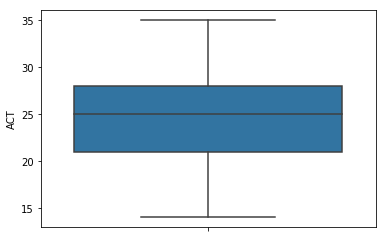

In [20]:
# data
data = pd.read_table('CH01PR19.txt', sep = ' ', header = None).dropna(axis = 1)
data.columns = ['GPA', 'ACT']
# (a) boxplot
sns.boxplot(data['ACT'], orient = 'v')
print("The mean of ACT is around 25 and the dataset don't have much outliers. The distriubtion of ACT score is almost like normal distribution")

The residual have equal variance


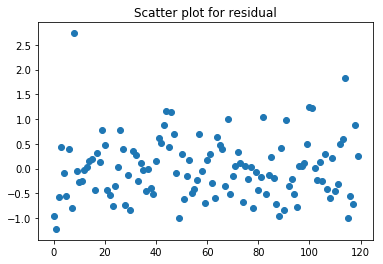

In [54]:
# (b) dot plot of the residuals
LReg33 = LinearReg(data = data)
beta_ols = LReg33.sklearn_ols(x = 'ACT', y = 'GPA')
intercept = beta_ols[0][0]
slope = beta_ols[1][0]
f33 = lambda x: slope*x + intercept
plt.scatter(data.index, (data['ACT'].map(f33) - data['GPA']))
plt.title('Scatter plot for residual')
print('The residual have equal variance')

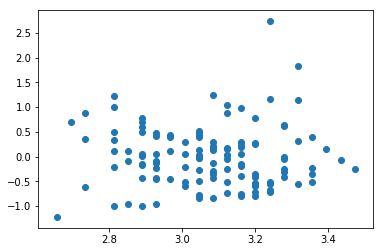

In [56]:
# (3)
plt.scatter(data['ACT'].map(f33), (data['ACT'].map(f33) - data['GPA']))